In [1]:
import xarray as xr
import scipy as sp
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score as f1
from sklearn.metrics import jaccard_score as jacc
import skimage.io as io
from sklearn.metrics import mean_squared_error as mse
from sklearn import preprocessing

In [3]:
all_data = xr.load_dataarray(r'C:\Users\vovam\Desktop\rotations\Leeat Keren\data\all_data.nc')

In [4]:
point5_hat_data = torch.load(r'C:\Users\vovam\Desktop\rotations\Leeat Keren\data\iter170500_0.08.pt',map_location=torch.device('cpu'))
point5_hat_data = point5_hat_data.detach().numpy().squeeze()

In [6]:
def get_scores(p_true, p_hat, point_name):
    ch_range = p_true.channels.values.shape[0]
    f1scores = np.zeros([1,ch_range])
    rmsescores = np.zeros([1,ch_range])
    
    for i in range(ch_range):

        true_data = p_true.sel(fovs=[point_name], channels = p_true.channels[i])
        true_data = true_data.values.squeeze().flatten()
        hat_data = p_hat[i,:,:].squeeze().flatten()

        binary_true = 1 * (true_data > 0)
        binary_hat = 1 *(hat_data > 0)

        f1scores[0,i] = f1(binary_true,binary_hat)
        rmsescores[0,i] = mse(true_data, hat_data, squared = False)/np.linalg.norm(true_data, ord=None, axis=None, keepdims=False)
    return(f1scores, rmsescores)
        #io.imsave(f'pictures/rp5_{chname}.tif', point5_hat.reshape((2048,2048)), check_contrast=False)
        #io.imsave(f'pictures/tp5_{chname}.tif', point5_true.reshape((2048,2048)), check_contrast=False)

In [9]:
trial_scores = get_scores(all_data, point5_hat_data,'Point5')

In [15]:
trial_scores

(array([[1.29749783e-02, 2.45512804e-01, 5.83398939e-02, 1.43285651e-01,
         5.00471212e-01, 6.19206984e-01, 1.30211164e-02, 9.07165562e-02,
         4.63449116e-02, 1.77684433e-01, 5.19831640e-02, 4.18022599e-01,
         1.35726419e-02, 8.75489592e-02, 1.34559500e-01, 6.64801096e-05,
         2.62162284e-04, 1.48992000e-01, 1.84747228e-01, 2.04689340e-02,
         1.11673723e-01, 8.36372523e-02, 6.43146366e-01, 1.31871514e-02,
         4.48725703e-01, 1.90484506e-02, 6.58056475e-03, 3.54988779e-03,
         2.34946139e-03, 4.10914671e-01, 5.49269276e-05, 7.33574190e-05,
         4.74814569e-05, 8.19586044e-01, 1.74532791e-01, 8.08416232e-01,
         2.15494647e-01, 4.55592167e-02, 1.44618504e-04, 8.25624677e-01]]),
 array([[3.38183802e-04, 2.73219967e-04, 3.47578140e-04, 1.94502149e-04,
         2.80701400e-05, 2.94389073e-04, 3.38443207e-04, 8.61283526e-05,
         1.49104196e-03, 5.53573345e-04, 2.91838558e-04, 8.91530165e-05,
         1.30075355e-04, 2.87600215e-04, 5.89359

In [27]:
def print_scores(scores, channels):
    for i, chname in enumerate(channels):
        print('For ch {}_{}'.format(i, chname))
        print('The f1 score is {} rmse is {}'.format(scores[0][0][i], scores[1][0][i]))

In [29]:
print_scores(trial_scores, all_data.channels.values)

For ch 0_CD209
The f1 score is 0.01297497827440969 rmse is 0.0003381838022427558
For ch 1_CD16
The f1 score is 0.24551280446591733 rmse is 0.0002732199674871678
For ch 2_PD-L1
The f1 score is 0.05833989393190404 rmse is 0.0003475781396847226
For ch 3_EGFR
The f1 score is 0.14328565079124006 rmse is 0.00019450214874630422
For ch 4_Vimentin
The f1 score is 0.5004712120154144 rmse is 2.8070139992173165e-05
For ch 5_phospho-S6
The f1 score is 0.619206984401591 rmse is 0.00029438907255094875
For ch 6_CSF-1R
The f1 score is 0.013021116426925331 rmse is 0.00033844320707551614
For ch 7_CD63
The f1 score is 0.0907165562463298 rmse is 8.61283526101381e-05
For ch 8_CD4
The f1 score is 0.046344911593440355 rmse is 0.0014910419611605936
For ch 9_Pan-Keratin
The f1 score is 0.17768443323089833 rmse is 0.0005535733449504494
For ch 10_IDO
The f1 score is 0.051983163995348636 rmse is 0.00029183855772760503
For ch 11_HLA-DR
The f1 score is 0.4180225991027119 rmse is 8.915301653603341e-05
For ch 12_MPO
T

0.1900032358226936
0.24830846739955972


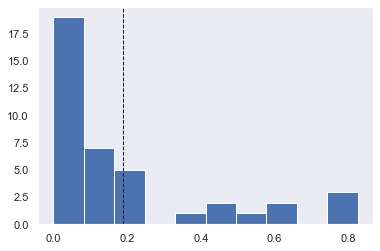

In [213]:
plt.hist(f1scores[0,:])
plt.axvline(np.mean(f1scores), color='k', linestyle='dashed', linewidth=1)
print(np.mean(f1scores))
print(np.std(f1scores))

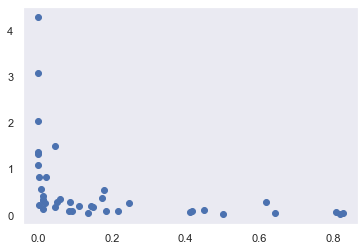

In [251]:
plt.scatter(f1scores,rmsescores*1000)

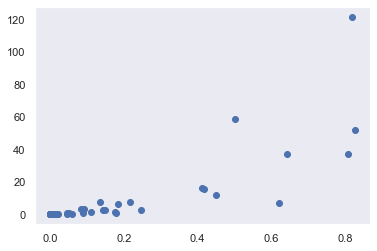

In [264]:
plt.scatter(f1scores, normf1/normrmse)

In [259]:
normrmse = preprocessing.normalize(rmsescores)
normf1 = preprocessing.normalize(f1scores)

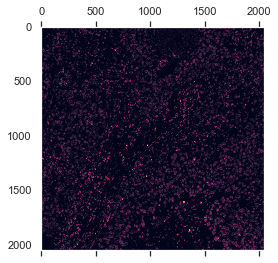

In [154]:
plt.rcParams["axes.grid"] = False
plt.matshow(point5_hat.reshape((2048,2048)))